<a href="https://colab.research.google.com/github/AduduF/Ensayos/blob/main/Proyecto_PEFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*  ## José Carlos Godoy Carbajal - 20181002061
*  ## Alejandro José Fúnez Bonilla #20173030156
*  ## Martha Alejandra Cano Mejía #20171030724
*  ## Jonathan Daniel Nuñez Molina #20171030886





# Probabilidad Efecto Fotoeléctrico

Introducción:

El efecto fotoeléctrico es un fenómeno fascinante de la física que desempeña un papel importante en varios campos científicos, como la radiología, optoelectrónicaía, la ciencia de los materiales y la astronomía. En este proyecto, nuestro objetivo es investigar la probabilidad del efecto fotoeléctrico en diferentes elementos y explorar los factores que lo afectan. Para comprender este fenómeno, examinaremos los principios de conservación de energía y cantidad de movimiento en el efecto fotoeléctrico. También estudiaremos la distribución angular de los fotoelectrones, que describe la probabilidad de que los electrones se emitan en diferentes ángulos en relación con el fotón incidente. Además, exploraremos el coeficiente de atenuación de masa para el efecto fotoeléctrico, que mide la efectividad de diferentes materiales para absorber fotones de una energía dada. Al estudiar estas propiedades, podemos obtener una comprensión más profunda del efecto fotoeléctrico y sus aplicaciones. A través de este proyecto, nuestro objetivo es contribuir a la investigación del proyecto en este campo de las interacciones fotón-materia.







El fotón es absorbido por completo y el electrón de la capa $K$ es eyectado del 
átomo como un fotoelectrón con energía cinética $$E_{k}=h\upsilon-E_{B}(K)$$

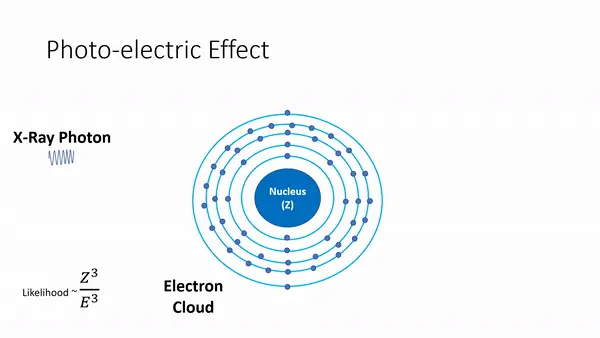

# Elementos a estudiar:




#1.   Tungsteno $W$

### Energía de enlace
Esta energía se mide en $MeV$ porque representa la cantidad de energía liberada o absorbida por cada nucleón del núcleo.

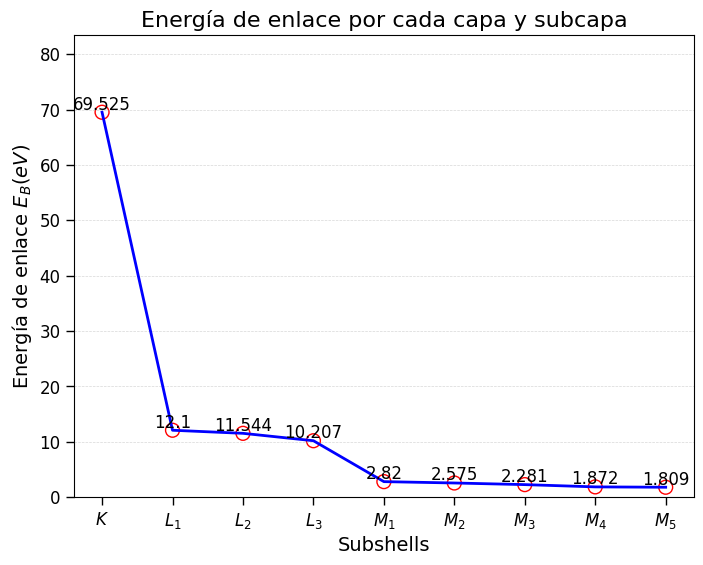

In [ ]:
import matplotlib.pyplot as plt

values = [69.525, 12.100, 11.544, 10.207, 2.820, 2.575, 2.281, 1.872, 1.809]
labels = ['$K$', '$L_{1}$', '$L_{2}$', '$L_{3}$', '$M_{1}$', '$M_{2}$', '$M_{3}$', '$M_{4}$', '$M_{5}$']

# Graficando los puntos vs subcapas
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(labels, values, linewidth=2, color='b')

# Seleccionando los puntos de EB
for i, val in enumerate(values):
    ax.scatter(labels[i], val, s=100, marker='o', edgecolors='r', facecolors='none')
    ax.annotate(f"{val}", (labels[i], val), xytext=(labels[i], val+0.5), fontsize=12, color='black', ha='center')

ax.set_xlabel('Subshells', fontsize=14)
ax.set_ylabel('Energía de enlace $E_{B} (eV)$', fontsize=14)
ax.set_title('Energía de enlace por cada capa y subcapa', fontsize=16)
ax.tick_params(axis='both', labelsize=12, length=6, width=1)
ax.set_ylim(0, max(values) * 1.2)
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

### Coeficiente de atenuación másico

El coeficiente de atenuación para el efecto fotoeléctrico 𝑎𝜏 como función 
de la energía del fotón incidente $ℎ𝑣$ exhibe una estructura característica de sierra en la que las  discontinuidades agudas, conocidas como bordes de absorción, surgen cada vez de que la energía del  fotón coincide con la energía de enlace de una determinada capa de electrones.

$$_a\tau_K= \alpha^4 (_e\sigma_{Th}) Z^n \sqrt{\frac{32}{\varepsilon^7}}$$



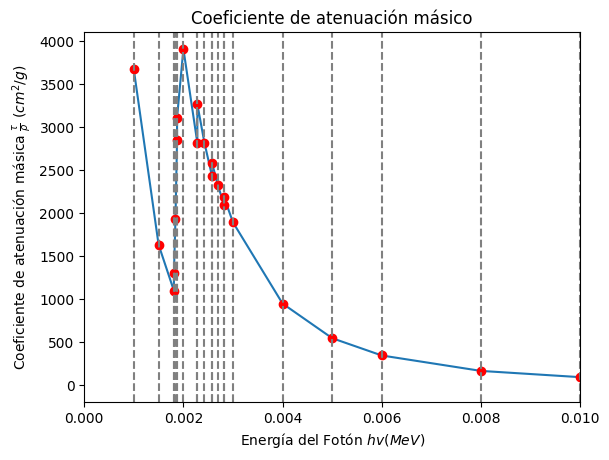

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Tungsten.txt', delimiter='\s+', skiprows=0, names=['Energy', 'Photoel'], header=None)

plt.plot(data['Energy'], data['Photoel'], '-', label='Data')
plt.plot(data['Energy'], data['Photoel'], 'ro', label='Data Points')

for x in data['Energy']:
    plt.axvline(x, color='gray', linestyle='--')

plt.xlabel('Energía del Fotón $hv (MeV)$')
plt.ylabel(r'Coeficiente de atenuación másica $\frac{\tau}{\rho}$ $(cm^{2}/g)$')
plt.title('Coeficiente de atenuación másico')
plt.xlim(0.0, 0.01)
plt.show()

### Parametro de borde de absorción

$\xi_{j}$ es un parámetro de borde de absorción definido para cada capa y subcapa $j$ como:

$$\xi_j=\frac{(\tau / \rho)_j^H-(\tau / \rho)_j^L}{(\tau / \rho)_j^H}$$


In [ ]:
import pandas as pd
from google.colab import files

def calculate_s(taomin, taomax):
    """
    Calcular Coeficientes de atenuación
    """
    return (taomax - taomin) / taomax

# Cargando base de datos
uploaded = files.upload()
df = pd.read_excel('atenuacionw.xlsx', sheet_name='Sheet1')
taomin_values = df['taomin'].tolist()
taomax_values = df['taomax'].tolist()

# Calculamos todos los valores de Shi
results = []
for taomin, taomax in zip(taomin_values, taomax_values):
    s = calculate_s(taomin, taomax)
    print(f"S({taomin}, {taomax}) = {s}")
    results.append(s)

# Creamos y guardamos valores de shi
df_results = pd.DataFrame({'S': results})
with pd.ExcelWriter('resultadosw.xlsx') as writer:
    df_results.to_excel(writer, sheet_name='Sheet1', index=False)

# Descargar
files.download('resultadosw.xlsx')

Saving atenuacionw.xlsx to atenuacionw.xlsx
S(2.118, 10.8) = 0.8038888888888889
S(202.8, 234.4) = 0.13481228668941977
S(165.0, 227.3) = 0.2740871095468544
S(87.59, 229.0) = 0.6175109170305677
S(2094.0, 2184.0) = 0.04120879120879121
S(2436.0, 2589.0) = 0.05909617612977984
S(2818.0, 3269.0) = 0.13796267971856838
S(2854.0, 3112.0) = 0.08290488431876607
S(1097.0, 1305.0) = 0.15938697318007664


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Probabilidad de efecto fotoeléctrico

Se determina con la ayuda del coeficiente de atenuación de masa 
fotoeléctrica $\tau/\rho$ trazado contra la energía del fotón hν para abarcar los bordes de absorción $K, L$ y $M$. 

$$P_j=\left(1-\sum_{n=0}^{j-1} P_n\right) \xi_j$$



$P_{0}$: 0
$P_{K}$: 0.8038888888888889
$P_{L1}$: 0.026438187334091773
$P_{L2}$: 0.04650516124640698
$P_{L3}$: 0.07605743798888162
$PL_{TOTAL}$: 0.14900078656938037
$P_{M1}$: 0.0019413595278185772
$P_{M2}$: 0.0026693131120620194
$P_{M3}$: 0.00586336586348561
$P_{M4}$: 0.0030373270558798466
$P_{M5}$: 0.005355236374219794
$P_{MTOTAL}$: 0.018866601933465846


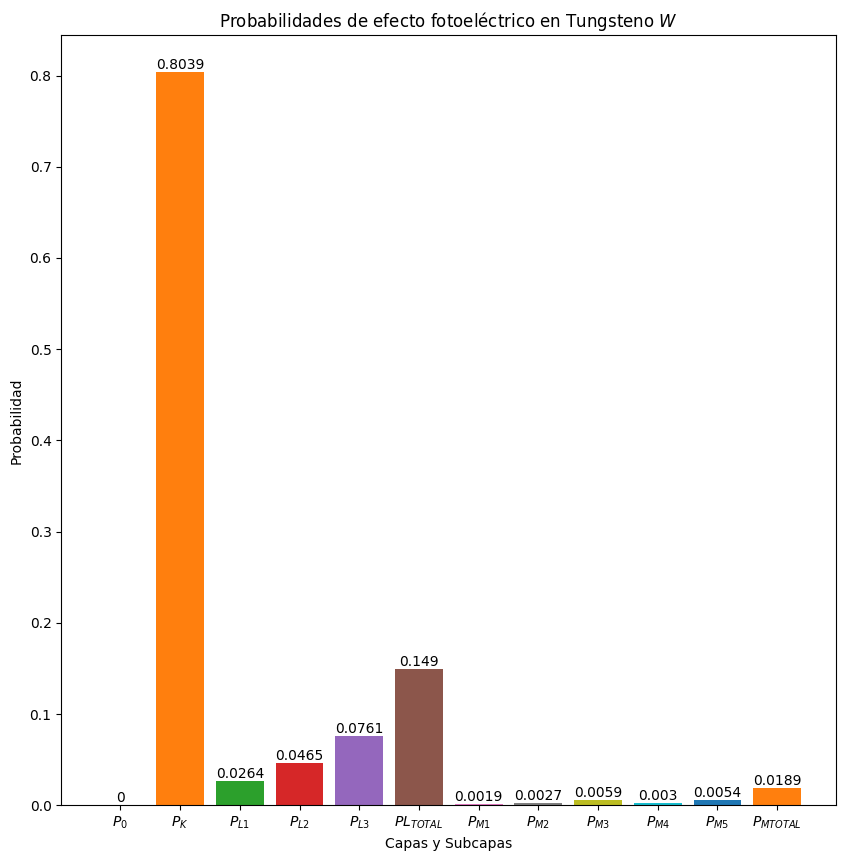

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Cargar resultados de shi anterior
df = pd.read_excel('resultadosw.xlsx')
xi = df['S'].tolist()

def calcular_P(n):
    if n == 0:
        return 0

    elif n == 1:
        k = (1 - calcular_P(0)) * xi[0]
        return k

    elif n == 2:
        l1 = (1 - (calcular_P(0) + calcular_P(1))) * xi[1]
        return l1

    elif n == 3:
        l2 = (1 - (calcular_P(0) + calcular_P(1) + calcular_P(2))) * xi[2]
        return l2

    elif n == 4:
        l3 = (1 - (calcular_P(0) + calcular_P(1) + calcular_P(2) + calcular_P(3))) * xi[3]
        return l3

    elif n == 5:
        L = calcular_P(2) + calcular_P(3) + calcular_P(4)
        return L
    
    elif n==6:
        m1=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)))*xi[4]
        return m1
    elif n==7:
        m2=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)))*xi[5]
        return m2
    elif n==8:
        m3=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)))*xi[6]
        return m3
    elif n==9:
        m4=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)+calcular_P(8)))*xi[7]
        return m4
    elif n==10:
        m5=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)+calcular_P(8)+calcular_P(9)))*xi[8]
        return m5

    elif n==11:
        M=calcular_P(6)+calcular_P(7)+calcular_P(8)+calcular_P(9)+calcular_P(10)
        return M
    

resultados = [calcular_P(0), calcular_P(1), calcular_P(2), calcular_P(3), calcular_P(4), calcular_P(5), calcular_P(6), calcular_P(7), calcular_P(8), calcular_P(9), calcular_P(10), calcular_P(11)]
labels = ['$P_{0}$', '$P_{K}$', '$P_{L1}$', '$P_{L2}$', '$P_{L3}$', "$PL_{TOTAL}$",'$P_{M1}$', '$P_{M2}$', '$P_{M3}$' , "$P_{M4}$", "$P_{M5}$",'$P_{MTOTAL}$']

for label, resultado in zip(labels, resultados):
    print(f"{label}: {resultado}")

plt.figure(figsize=(10, 10)) 
for label, resultado in zip(labels, resultados):
    plt.bar(label, resultado)
    plt.text(label, resultado, str(round(resultado, 4)), ha='center', va='bottom')


plt.xlabel('Capas y Subcapas')
plt.ylabel('Probabilidad')
plt.title('Probabilidades de efecto fotoeléctrico en Tungsteno $W$')
 
plt.show()


#2.   Oro $Au$

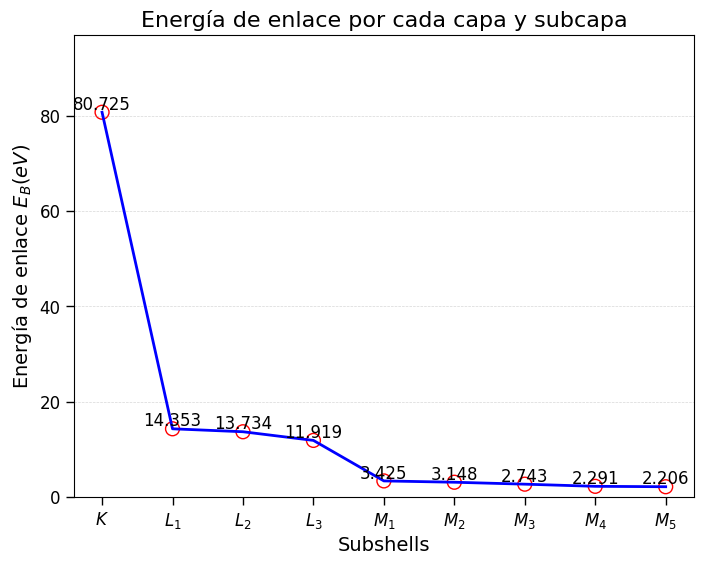

In [ ]:
#@title Energía de enlace
import matplotlib.pyplot as plt

values = [80.725, 14.353, 13.734, 11.919, 3.425, 3.148, 2.743, 2.291, 2.206]
labels = ['$K$', '$L_{1}$', '$L_{2}$', '$L_{3}$', '$M_{1}$', '$M_{2}$', '$M_{3}$', '$M_{4}$', '$M_{5}$']

# Graficando los puntos vs subcapas
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(labels, values, linewidth=2, color='b')

# Seleccionando los puntos de EB
for i, val in enumerate(values):
    ax.scatter(labels[i], val, s=100, marker='o', edgecolors='r', facecolors='none')
    ax.annotate(f"{val}", (labels[i], val), xytext=(labels[i], val+0.5), fontsize=12, color='black', ha='center')

ax.set_xlabel('Subshells', fontsize=14)
ax.set_ylabel('Energía de enlace $E_{B} (eV)$', fontsize=14)
ax.set_title('Energía de enlace por cada capa y subcapa', fontsize=16)
ax.tick_params(axis='both', labelsize=12, length=6, width=1)
ax.set_ylim(0, max(values) * 1.2)
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

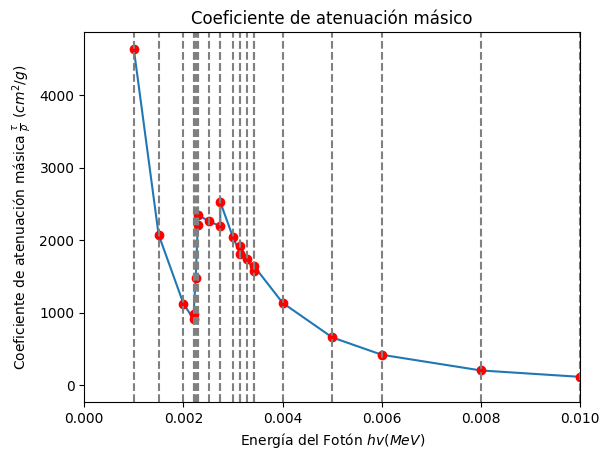

In [ ]:
#@title Coeficientes de atenuación másico
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('oro.txt', delimiter='\s+', skiprows=0, names=['Energy', 'Photoel'], header=None)

plt.plot(data['Energy'], data['Photoel'], '-', label='Data')
plt.plot(data['Energy'], data['Photoel'], 'ro', label='Data Points')

for x in data['Energy']:
    plt.axvline(x, color='gray', linestyle='--')

plt.xlabel('Energía del Fotón $hv (MeV)$')
plt.ylabel(r'Coeficiente de atenuación másica $\frac{\tau}{\rho}$ $(cm^{2}/g)$')
plt.title('Coeficiente de atenuación másico')
plt.xlim(0.0, 0.01)
plt.show()

In [ ]:
#@title Resultados de atenuación en cada capa
import pandas as pd
from google.colab import files

def calculate_s(taomin, taomax):
    """
    Calcular Coeficientes de atenuación
    """
    return (taomax - taomin) / taomax

# Cargando base de datos
uploaded = files.upload()
df = pd.read_excel('atenuacionau.xlsx', sheet_name='Sheet1')
taomin_values = df['taomin'].tolist()
taomax_values = df['taomax'].tolist()

# Calculamos todos los valores de Shi
results = []
for taomin, taomax in zip(taomin_values, taomax_values):
    s = calculate_s(taomin, taomax)
    print(f"S({taomin}, {taomax}) = {s}")
    results.append(s)

# Creamos y guardamos valores de shi
df_results = pd.DataFrame({'S': results})
with pd.ExcelWriter('resultadosau.xlsx') as writer:
    df_results.to_excel(writer, sheet_name='Sheet1', index=False)

# Descargar
files.download('resultadosau.xlsx')

Saving atenuacionau.xlsx to atenuacionau (1).xlsx
S(1.746, 8.512) = 0.7948778195488722
S(155.4, 179.6) = 0.13474387527839637
S(124.7, 172.9) = 0.27877385772122615
S(71.7, 182.9) = 0.6079825041006014
S(1575.0, 1642.0) = 0.04080389768574909
S(1812.0, 1923.0) = 0.057722308892355696
S(2191.0, 2529.0) = 0.13364966389877422
S(2214.0, 2347.0) = 0.056668086919471665
S(907.8, 982.7) = 0.07621858145924502


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

$P_{0}$: 0
$P_{K}$: 0.7948778195488722
$P_{L1}$: 0.027638957499539492
$P_{L2}$: 0.049477682743010745
$P_{L3}$: 0.07782512887476122
$PL_{TOTAL}$: 0.15494176911731145
$P_{M1}$: 0.0020475563698938506
$P_{M2}$: 0.0027783395220984976
$P_{M3}$: 0.006061615745091557
$P_{M4}$: 0.002226653455332522
$P_{M5}$: 0.002825136708538579
$P_{MTOTAL}$: 0.015939301800955007


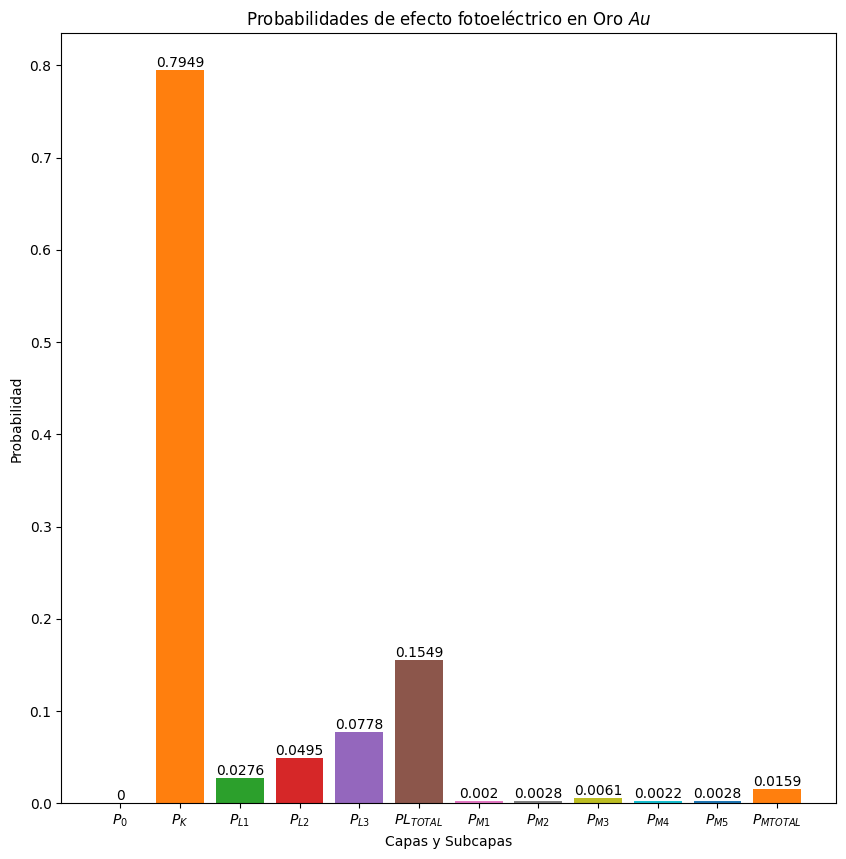

In [ ]:
#@title Probabilidades en cada capa y subcapa
import pandas as pd
import matplotlib.pyplot as plt

#Cargar resultados de shi anterior
df = pd.read_excel('resultadosau.xlsx')
xi = df['S'].tolist()

def calcular_P(n):
    if n == 0:
        return 0

    elif n == 1:
        k = (1 - calcular_P(0)) * xi[0]
        return k

    elif n == 2:
        l1 = (1 - (calcular_P(0) + calcular_P(1))) * xi[1]
        return l1

    elif n == 3:
        l2 = (1 - (calcular_P(0) + calcular_P(1) + calcular_P(2))) * xi[2]
        return l2

    elif n == 4:
        l3 = (1 - (calcular_P(0) + calcular_P(1) + calcular_P(2) + calcular_P(3))) * xi[3]
        return l3

    elif n == 5:
        L = calcular_P(2) + calcular_P(3) + calcular_P(4)
        return L
    
    elif n==6:
        m1=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)))*xi[4]
        return m1
    elif n==7:
        m2=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)))*xi[5]
        return m2
    elif n==8:
        m3=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)))*xi[6]
        return m3
    elif n==9:
        m4=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)+calcular_P(8)))*xi[7]
        return m4
    elif n==10:
        m5=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)+calcular_P(8)+calcular_P(9)))*xi[8]
        return m5

    elif n==11:
        M=calcular_P(6)+calcular_P(7)+calcular_P(8)+calcular_P(9)+calcular_P(10)
        return M
    

resultados = [calcular_P(0), calcular_P(1), calcular_P(2), calcular_P(3), calcular_P(4), calcular_P(5), calcular_P(6), calcular_P(7), calcular_P(8), calcular_P(9), calcular_P(10), calcular_P(11)]
labels = ['$P_{0}$', '$P_{K}$', '$P_{L1}$', '$P_{L2}$', '$P_{L3}$', "$PL_{TOTAL}$",'$P_{M1}$', '$P_{M2}$', '$P_{M3}$' , "$P_{M4}$", "$P_{M5}$",'$P_{MTOTAL}$']

for label, resultado in zip(labels, resultados):
    print(f"{label}: {resultado}")

plt.figure(figsize=(10, 10)) 
for label, resultado in zip(labels, resultados):
    plt.bar(label, resultado)
    plt.text(label, resultado, str(round(resultado, 4)), ha='center', va='bottom')


plt.xlabel('Capas y Subcapas')
plt.ylabel('Probabilidad')
plt.title('Probabilidades de efecto fotoeléctrico en Oro $Au$')
 
plt.show()


#3.   Plomo $Pb$


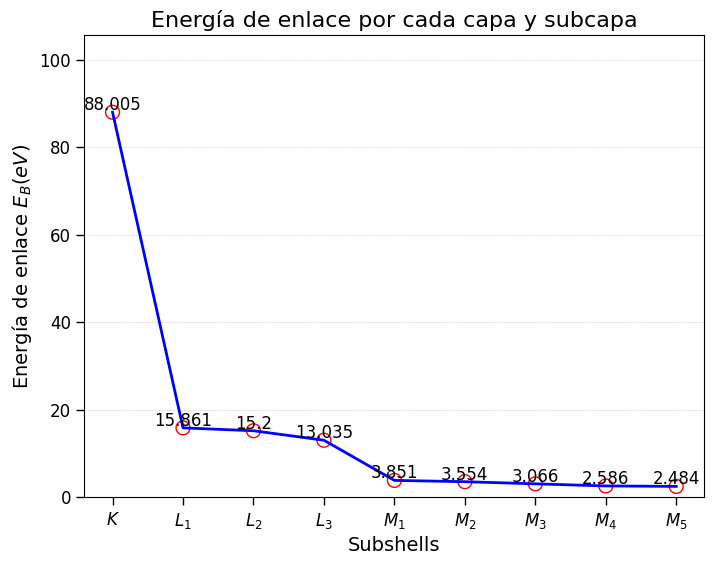

In [ ]:
#@title Energía de enlace
import matplotlib.pyplot as plt

values = [88.005, 15.861, 15.200, 13.035, 3.851, 3.554, 3.066, 2.586, 2.484]
labels = ['$K$', '$L_{1}$', '$L_{2}$', '$L_{3}$', '$M_{1}$', '$M_{2}$', '$M_{3}$', '$M_{4}$', '$M_{5}$']

# Graficando los puntos vs subcapas
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(labels, values, linewidth=2, color='b')

# Seleccionando los puntos de EB
for i, val in enumerate(values):
    ax.scatter(labels[i], val, s=100, marker='o', edgecolors='r', facecolors='none')
    ax.annotate(f"{val}", (labels[i], val), xytext=(labels[i], val+0.5), fontsize=12, color='black', ha='center')

ax.set_xlabel('Subshells', fontsize=14)
ax.set_ylabel('Energía de enlace $E_{B} (eV)$', fontsize=14)
ax.set_title('Energía de enlace por cada capa y subcapa', fontsize=16)
ax.tick_params(axis='both', labelsize=12, length=6, width=1)
ax.set_ylim(0, max(values) * 1.2)
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

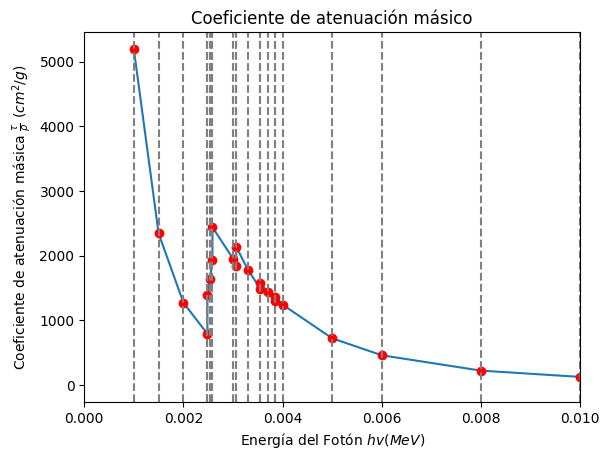

In [ ]:
#@title Coeficientes de atenuación másico
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('plomo.txt', delimiter='\s+', skiprows=0, names=['Energy', 'Photoel'], header=None)

plt.plot(data['Energy'], data['Photoel'], '-', label='Data')
plt.plot(data['Energy'], data['Photoel'], 'ro', label='Data Points')

for x in data['Energy']:
    plt.axvline(x, color='gray', linestyle='--')

plt.xlabel('Energía del Fotón $hv (MeV)$')
plt.ylabel(r'Coeficiente de atenuación másica $\frac{\tau}{\rho}$ $(cm^{2}/g)$')
plt.title('Coeficiente de atenuación másico')
plt.xlim(0.0, 0.01)
plt.show()

In [ ]:
#@title Resultados de atenuación en cada capa
import pandas as pd
from google.colab import files

def calculate_s(taomin, taomax):
    """
    Calcular Coeficientes de atenuación
    """
    return (taomax - taomin) / taomax

# Cargando base de datos
uploaded = files.upload()
df = pd.read_excel('atenuacionpb.xlsx', sheet_name='Sheet1')
taomin_values = df['taomin'].tolist()
taomax_values = df['taomax'].tolist()

# Calculamos todos los valores de Shi
results = []
for taomin, taomax in zip(taomin_values, taomax_values):
    s = calculate_s(taomin, taomax)
    print(f"S({taomin}, {taomax}) = {s}")
    results.append(s)

# Creamos y guardamos valores de shi
df_results = pd.DataFrame({'S': results})
with pd.ExcelWriter('resultadospb.xlsx') as writer:
    df_results.to_excel(writer, sheet_name='Sheet1', index=False)

# Descargar
files.download('resultadospb.xlsx')

Saving atenuacionpb.xlsx to atenuacionpb.xlsx
S(1.547, 7.321) = 0.7886900696626145
S(131.2, 151.7) = 0.13513513513513514
S(104.5, 145.2) = 0.2803030303030302
S(63.1, 158.2) = 0.6011378002528445
S(1302.0, 1358.0) = 0.041237113402061855
S(1486.0, 1575.0) = 0.05650793650793651
S(1847.0, 2136.0) = 0.1352996254681648
S(1933.0, 2439.0) = 0.2074620746207462
S(790.0, 1385.0) = 0.4296028880866426


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

$P_{0}$: 0
$P_{K}$: 0.7886900696626145
$P_{L1}$: 0.028555395991538578
$P_{L2}$: 0.051226649778760125
$P_{L3}$: 0.07906638320056865
$PL_{TOTAL}$: 0.15884842897086737
$P_{M1}$: 0.0021633608810935324
$P_{M2}$: 0.0028422441290176493
$P_{M3}$: 0.0064207650032779146
$P_{M4}$: 0.008513233482854989
$P_{M5}$: 0.01397150125112856
$P_{MTOTAL}$: 0.03391110474737265


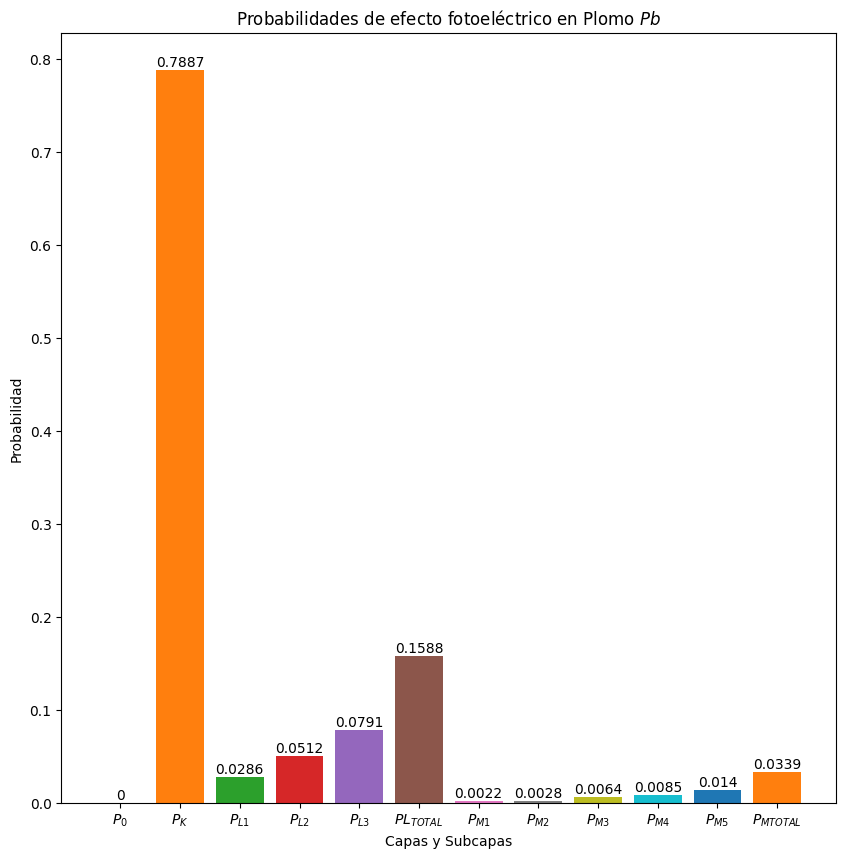

In [ ]:
#@title Probabilidades en cada capa y subcapa
import pandas as pd
import matplotlib.pyplot as plt

#Cargar resultados de shi anterior
df = pd.read_excel('resultadospb.xlsx')
xi = df['S'].tolist()

def calcular_P(n):
    if n == 0:
        return 0

    elif n == 1:
        k = (1 - calcular_P(0)) * xi[0]
        return k

    elif n == 2:
        l1 = (1 - (calcular_P(0) + calcular_P(1))) * xi[1]
        return l1

    elif n == 3:
        l2 = (1 - (calcular_P(0) + calcular_P(1) + calcular_P(2))) * xi[2]
        return l2

    elif n == 4:
        l3 = (1 - (calcular_P(0) + calcular_P(1) + calcular_P(2) + calcular_P(3))) * xi[3]
        return l3

    elif n == 5:
        L = calcular_P(2) + calcular_P(3) + calcular_P(4)
        return L
    
    elif n==6:
        m1=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)))*xi[4]
        return m1
    elif n==7:
        m2=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)))*xi[5]
        return m2
    elif n==8:
        m3=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)))*xi[6]
        return m3
    elif n==9:
        m4=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)+calcular_P(8)))*xi[7]
        return m4
    elif n==10:
        m5=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)+calcular_P(8)+calcular_P(9)))*xi[8]
        return m5

    elif n==11:
        M=calcular_P(6)+calcular_P(7)+calcular_P(8)+calcular_P(9)+calcular_P(10)
        return M
    

resultados = [calcular_P(0), calcular_P(1), calcular_P(2), calcular_P(3), calcular_P(4), calcular_P(5), calcular_P(6), calcular_P(7), calcular_P(8), calcular_P(9), calcular_P(10), calcular_P(11)]
labels = ['$P_{0}$', '$P_{K}$', '$P_{L1}$', '$P_{L2}$', '$P_{L3}$', "$PL_{TOTAL}$",'$P_{M1}$', '$P_{M2}$', '$P_{M3}$' , "$P_{M4}$", "$P_{M5}$",'$P_{MTOTAL}$']

for label, resultado in zip(labels, resultados):
    print(f"{label}: {resultado}")

plt.figure(figsize=(10, 10)) 
for label, resultado in zip(labels, resultados):
    plt.bar(label, resultado)
    plt.text(label, resultado, str(round(resultado, 4)), ha='center', va='bottom')


plt.xlabel('Capas y Subcapas')
plt.ylabel('Probabilidad')
plt.title('Probabilidades de efecto fotoeléctrico en Plomo $Pb$')
 
plt.show()


# 4. Polonio $Po$

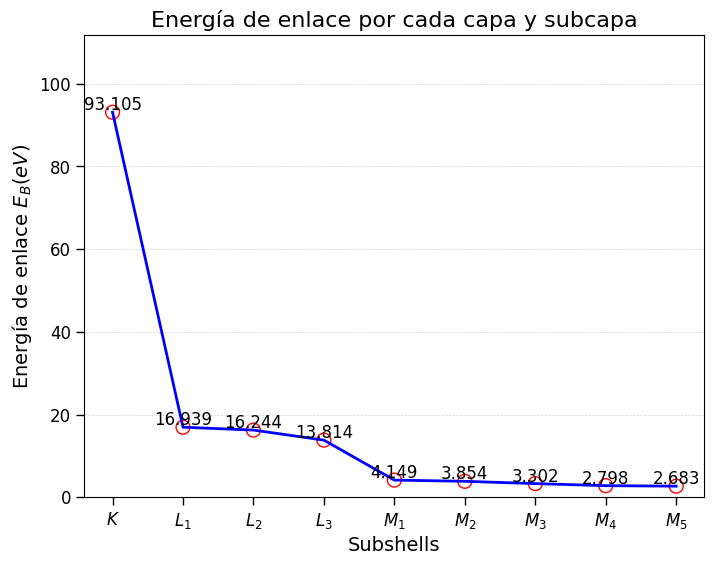

In [ ]:
#@title Energía de enlace
import matplotlib.pyplot as plt

values = [93.105, 16.939, 16.244, 13.814, 4.149, 3.854, 3.302, 2.798, 2.683]
labels = ['$K$', '$L_{1}$', '$L_{2}$', '$L_{3}$', '$M_{1}$', '$M_{2}$', '$M_{3}$', '$M_{4}$', '$M_{5}$']

# Graficando los puntos vs subcapas
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(labels, values, linewidth=2, color='b')

# Seleccionando los puntos de EB
for i, val in enumerate(values):
    ax.scatter(labels[i], val, s=100, marker='o', edgecolors='r', facecolors='none')
    ax.annotate(f"{val}", (labels[i], val), xytext=(labels[i], val+0.5), fontsize=12, color='black', ha='center')

ax.set_xlabel('Subshells', fontsize=14)
ax.set_ylabel('Energía de enlace $E_{B} (eV)$', fontsize=14)
ax.set_title('Energía de enlace por cada capa y subcapa', fontsize=16)
ax.tick_params(axis='both', labelsize=12, length=6, width=1)
ax.set_ylim(0, max(values) * 1.2)
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

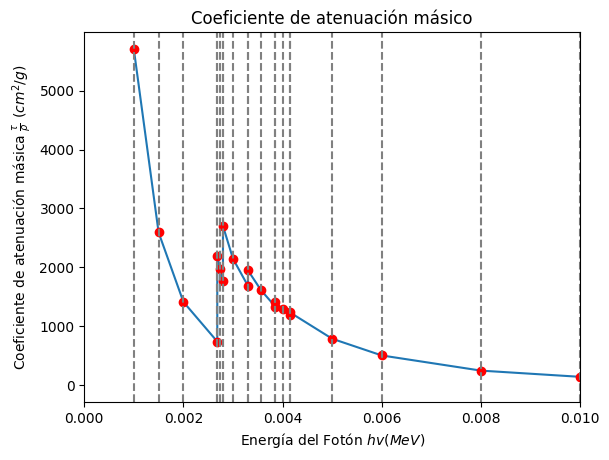

In [ ]:
#@title Coeficientes de atenuación másico
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('polonio.txt', delimiter='\s+', skiprows=0, names=['Energy', 'Photoel'], header=None)

plt.plot(data['Energy'], data['Photoel'], '-', label='Data')
plt.plot(data['Energy'], data['Photoel'], 'ro', label='Data Points')

for x in data['Energy']:
    plt.axvline(x, color='gray', linestyle='--')

plt.xlabel('Energía del Fotón $hv (MeV)$')
plt.ylabel(r'Coeficiente de atenuación másica $\frac{\tau}{\rho}$ $(cm^{2}/g)$')
plt.title('Coeficiente de atenuación másico')
plt.xlim(0.0, 0.01)
plt.show()

In [ ]:
#@title Resultados de atenuación en cada capa
import pandas as pd
from google.colab import files

def calculate_s(taomin, taomax):
    """
    Calcular Coeficientes de atenuación
    """
    return (taomax - taomin) / taomax

# Cargando base de datos
uploaded = files.upload()
df = pd.read_excel('atenuacionpo.xlsx', sheet_name='Sheet1')
taomin_values = df['taomin'].tolist()
taomax_values = df['taomax'].tolist()

# Calculamos todos los valores de Shi
results = []
for taomin, taomax in zip(taomin_values, taomax_values):
    s = calculate_s(taomin, taomax)
    print(f"S({taomin}, {taomax}) = {s}")
    results.append(s)

# Creamos y guardamos valores de shi
df_results = pd.DataFrame({'S': results})
with pd.ExcelWriter('resultadospo.xlsx') as writer:
    df_results.to_excel(writer, sheet_name='Sheet1', index=False)

# Descargar
files.download('resultadospo.xlsx')

Saving atenuacionpo.xlsx to atenuacionpo (1).xlsx
S(1.47, 6.79) = 0.7835051546391752
S(120.0, 139.0) = 0.1366906474820144
S(95.3, 133.0) = 0.28345864661654135
S(59.5, 148.0) = 0.597972972972973
S(1180.0, 1230.0) = 0.04065040650406504
S(1330.0, 1410.0) = 0.05673758865248227
S(1680.0, 1950.0) = 0.13846153846153847
S(1760.0, 2700.0) = 0.34814814814814815
S(737.0, 2200.0) = 0.665


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

$P_{0}$: 0
$P_{K}$: 0.7835051546391752
$P_{L1}$: 0.029592820588889717
$P_{L2}$: 0.052978994991744015
$P_{L3}$: 0.08008235226720888
$PL_{TOTAL}$: 0.1626541678478426
$P_{M1}$: 0.0021886454273569982
$P_{M2}$: 0.0029306117495390177
$P_{M3}$: 0.006746042815765779
$P_{M4}$: 0.014613649951518969
$P_{M5}$: 0.018195548833253004
$P_{MTOTAL}$: 0.04467449877743376


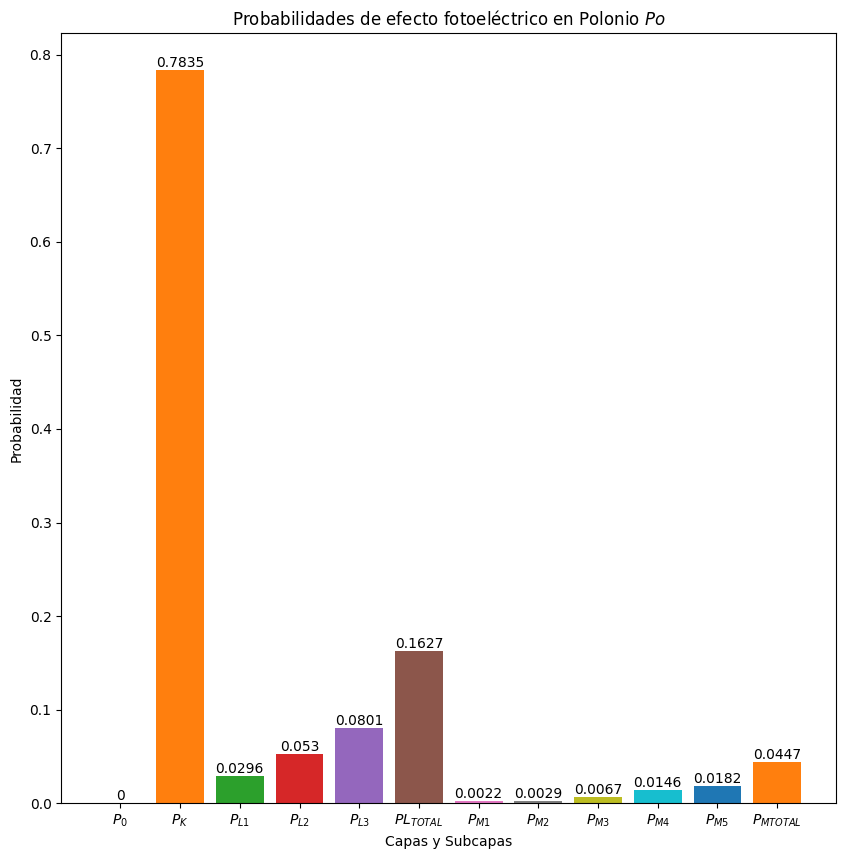

In [ ]:
#@title Probabilidades en cada capa y subcapa
import pandas as pd
import matplotlib.pyplot as plt

#Cargar resultados de shi anterior
df = pd.read_excel('resultadospo.xlsx')
xi = df['S'].tolist()

def calcular_P(n):
    if n == 0:
        return 0

    elif n == 1:
        k = (1 - calcular_P(0)) * xi[0]
        return k

    elif n == 2:
        l1 = (1 - (calcular_P(0) + calcular_P(1))) * xi[1]
        return l1

    elif n == 3:
        l2 = (1 - (calcular_P(0) + calcular_P(1) + calcular_P(2))) * xi[2]
        return l2

    elif n == 4:
        l3 = (1 - (calcular_P(0) + calcular_P(1) + calcular_P(2) + calcular_P(3))) * xi[3]
        return l3

    elif n == 5:
        L = calcular_P(2) + calcular_P(3) + calcular_P(4)
        return L
    
    elif n==6:
        m1=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)))*xi[4]
        return m1
    elif n==7:
        m2=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)))*xi[5]
        return m2
    elif n==8:
        m3=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)))*xi[6]
        return m3
    elif n==9:
        m4=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)+calcular_P(8)))*xi[7]
        return m4
    elif n==10:
        m5=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)+calcular_P(8)+calcular_P(9)))*xi[8]
        return m5

    elif n==11:
        M=calcular_P(6)+calcular_P(7)+calcular_P(8)+calcular_P(9)+calcular_P(10)
        return M
    

resultados = [calcular_P(0), calcular_P(1), calcular_P(2), calcular_P(3), calcular_P(4), calcular_P(5), calcular_P(6), calcular_P(7), calcular_P(8), calcular_P(9), calcular_P(10), calcular_P(11)]
labels = ['$P_{0}$', '$P_{K}$', '$P_{L1}$', '$P_{L2}$', '$P_{L3}$', "$PL_{TOTAL}$",'$P_{M1}$', '$P_{M2}$', '$P_{M3}$' , "$P_{M4}$", "$P_{M5}$",'$P_{MTOTAL}$']

for label, resultado in zip(labels, resultados):
    print(f"{label}: {resultado}")

plt.figure(figsize=(10, 10)) 
for label, resultado in zip(labels, resultados):
    plt.bar(label, resultado)
    plt.text(label, resultado, str(round(resultado, 4)), ha='center', va='bottom')


plt.xlabel('Capas y Subcapas')
plt.ylabel('Probabilidad')
plt.title('Probabilidades de efecto fotoeléctrico en Polonio $Po$')
 
plt.show()


# 5. Uranio $U$

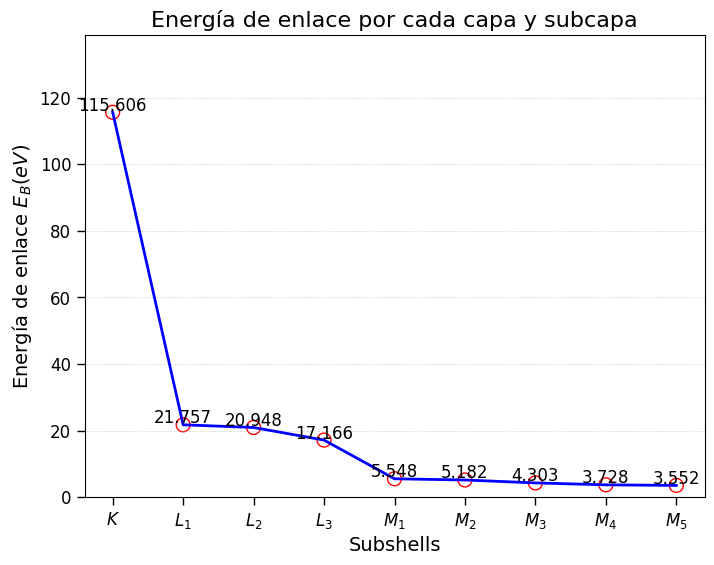

In [ ]:
#@title Energía de enlace
import matplotlib.pyplot as plt

values = [115.606, 21.757, 20.948, 17.166, 5.548, 5.182, 4.303, 3.728, 3.552]
labels = ['$K$', '$L_{1}$', '$L_{2}$', '$L_{3}$', '$M_{1}$', '$M_{2}$', '$M_{3}$', '$M_{4}$', '$M_{5}$']

# Graficando los puntos vs subcapas
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(labels, values, linewidth=2, color='b')

# Seleccionando los puntos de EB
for i, val in enumerate(values):
    ax.scatter(labels[i], val, s=100, marker='o', edgecolors='r', facecolors='none')
    ax.annotate(f"{val}", (labels[i], val), xytext=(labels[i], val+0.5), fontsize=12, color='black', ha='center')

ax.set_xlabel('Subshells', fontsize=14)
ax.set_ylabel('Energía de enlace $E_{B} (eV)$', fontsize=14)
ax.set_title('Energía de enlace por cada capa y subcapa', fontsize=16)
ax.tick_params(axis='both', labelsize=12, length=6, width=1)
ax.set_ylim(0, max(values) * 1.2)
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

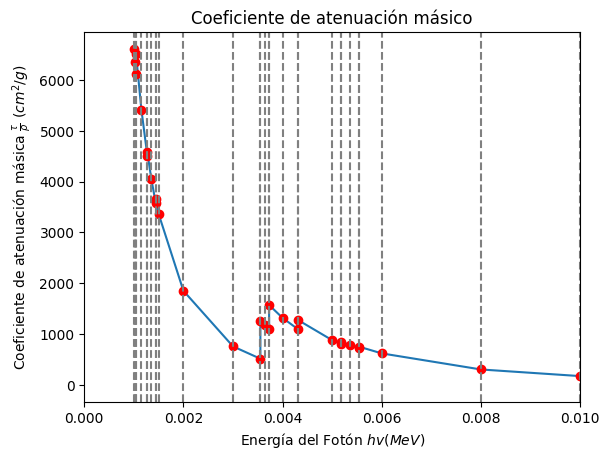

In [ ]:
#@title Coeficientes de atenuación másico
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('uranio.txt', delimiter='\s+', skiprows=0, names=['Energy', 'Photoel'], header=None)

plt.plot(data['Energy'], data['Photoel'], '-', label='Data')
plt.plot(data['Energy'], data['Photoel'], 'ro', label='Data Points')

for x in data['Energy']:
    plt.axvline(x, color='gray', linestyle='--')

plt.xlabel('Energía del Fotón $hv (MeV)$')
plt.ylabel(r'Coeficiente de atenuación másica $\frac{\tau}{\rho}$ $(cm^{2}/g)$')
plt.title('Coeficiente de atenuación másico')
plt.xlim(0.0, 0.01)
plt.show()

In [ ]:
#@title Resultados de atenuación en cada capa
import pandas as pd
from google.colab import files

def calculate_s(taomin, taomax):
    """
    Calcular Coeficientes de atenuación
    """
    return (taomax - taomin) / taomax

# Cargando base de datos
uploaded = files.upload()
df = pd.read_excel('atenuacionu.xlsx', sheet_name='Sheet1')
taomin_values = df['taomin'].tolist()
taomax_values = df['taomax'].tolist()

# Calculamos todos los valores de Shi
results = []
for taomin, taomax in zip(taomin_values, taomax_values):
    s = calculate_s(taomin, taomax)
    print(f"S({taomin}, {taomax}) = {s}")
    results.append(s)

# Creamos y guardamos valores de shi
df_results = pd.DataFrame({'S': results})
with pd.ExcelWriter('resultadosu.xlsx') as writer:
    df_results.to_excel(writer, sheet_name='Sheet1', index=False)

# Descargar
files.download('resultadosu.xlsx')

Saving atenuacionu.xlsx to atenuacionu (1).xlsx
S(1.09, 4.6) = 0.7630434782608696
S(77.8, 89.7) = 0.13266443701226316
S(60.4, 85.8) = 0.296037296037296
S(43.3, 104.0) = 0.5836538461538462
S(720.0, 751.0) = 0.041278295605858856
S(803.0, 852.0) = 0.057511737089201875
S(1100.0, 1280.0) = 0.140625
S(1100.0, 1570.0) = 0.29936305732484075
S(515.0, 1260.0) = 0.5912698412698413


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

$P_{0}$: 0
$P_{K}$: 0.7630434782608696
$P_{L1}$: 0.031435703552905835
$P_{L2}$: 0.06084182729522265
$P_{L3}$: 0.08444244949119054
$PL_{TOTAL}$: 0.17671998033931902
$P_{M1}$: 0.0024864617621759696
$P_{M2}$: 0.0033213073970001614
$P_{M3}$: 0.007654046096339332
$P_{M4}$: 0.014002625024088583
$P_{M5}$: 0.01937715502742418
$P_{MTOTAL}$: 0.04684159530702823


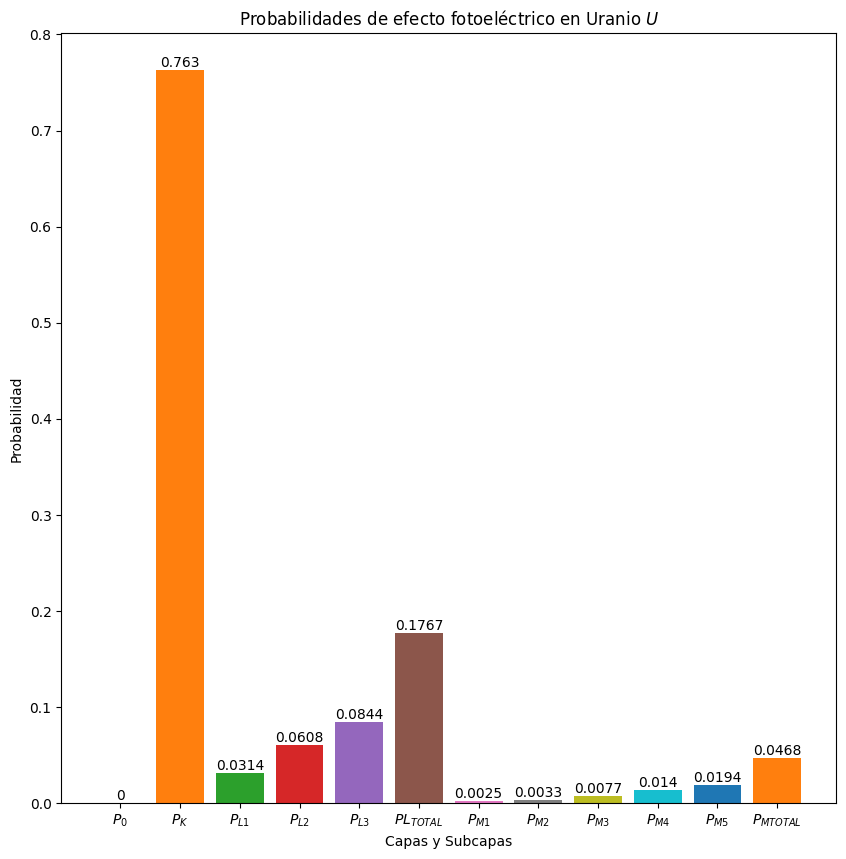

In [ ]:
#@title Probabilidades en cada capa y subcapa
import pandas as pd
import matplotlib.pyplot as plt

#Cargar resultados de shi anterior
df = pd.read_excel('resultadosu.xlsx')
xi = df['S'].tolist()

def calcular_P(n):
    if n == 0:
        return 0

    elif n == 1:
        k = (1 - calcular_P(0)) * xi[0]
        return k

    elif n == 2:
        l1 = (1 - (calcular_P(0) + calcular_P(1))) * xi[1]
        return l1

    elif n == 3:
        l2 = (1 - (calcular_P(0) + calcular_P(1) + calcular_P(2))) * xi[2]
        return l2

    elif n == 4:
        l3 = (1 - (calcular_P(0) + calcular_P(1) + calcular_P(2) + calcular_P(3))) * xi[3]
        return l3

    elif n == 5:
        L = calcular_P(2) + calcular_P(3) + calcular_P(4)
        return L
    
    elif n==6:
        m1=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)))*xi[4]
        return m1
    elif n==7:
        m2=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)))*xi[5]
        return m2
    elif n==8:
        m3=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)))*xi[6]
        return m3
    elif n==9:
        m4=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)+calcular_P(8)))*xi[7]
        return m4
    elif n==10:
        m5=(1-(calcular_P(0)+calcular_P(1)+calcular_P(5)+calcular_P(6)+calcular_P(7)+calcular_P(8)+calcular_P(9)))*xi[8]
        return m5

    elif n==11:
        M=calcular_P(6)+calcular_P(7)+calcular_P(8)+calcular_P(9)+calcular_P(10)
        return M
    

resultados = [calcular_P(0), calcular_P(1), calcular_P(2), calcular_P(3), calcular_P(4), calcular_P(5), calcular_P(6), calcular_P(7), calcular_P(8), calcular_P(9), calcular_P(10), calcular_P(11)]
labels = ['$P_{0}$', '$P_{K}$', '$P_{L1}$', '$P_{L2}$', '$P_{L3}$', "$PL_{TOTAL}$",'$P_{M1}$', '$P_{M2}$', '$P_{M3}$' , "$P_{M4}$", "$P_{M5}$",'$P_{MTOTAL}$']

for label, resultado in zip(labels, resultados):
    print(f"{label}: {resultado}")

plt.figure(figsize=(10, 10)) 
for label, resultado in zip(labels, resultados):
    plt.bar(label, resultado)
    plt.text(label, resultado, str(round(resultado, 4)), ha='center', va='bottom')


plt.xlabel('Capas y Subcapas')
plt.ylabel('Probabilidad')
plt.title('Probabilidades de efecto fotoeléctrico en Uranio $U$')
 
plt.show()
